# 2. Machine Learning Basics: Predicting Kubernetes Incidents - Part 1

## Introduction

Machine Learning (ML) enables computers to learn from data and make predictions without being explicitly programmed. In this notebook, we’ll use ML to predict Kubernetes incidents (e.g., `Normal` vs. `Warning`) based on system metrics like CPU and memory usage.

By the end of this notebook, you will:
- Understand the basics of machine learning and supervised learning.
- Learn how to prepare data for a machine learning model.
- Train and evaluate a simple decision tree model.
- Interpret the model's predictions.

**Instructions**:
- Follow each section sequentially.
- Pay attention to markdown cells that explain each concept and code snippet.

## 1. What is AI and Machine Learning?

### Artificial Intelligence (AI)
AI is the field of computer science that focuses on creating systems capable of performing tasks that typically require human intelligence, such as decision-making, pattern recognition, and problem-solving.

### Machine Learning? (ML)

Machine Learning (ML) is a field of computer science where machines learn patterns from data to make decisions or predictions. It’s like teaching a machine to recognize situations and take appropriate actions based on experience.

### Types of Machine Learning
- **Supervised Learning**: The model learns from labeled data (e.g., predict incidents like `Normal` or `Warning` based on metrics).
- **Unsupervised Learning**: The model identifies patterns in unlabeled data (e.g., detect anomalies).
- **Reinforcement Learning**: The model learns by trial and error (e.g., optimizing a process).

In this notebook, we’ll focus on **supervised learning** to predict Kubernetes incidents.

## 2. Simple Prediction Example

Let’s understand prediction with a simple example. Imagine you’re managing a Kubernetes cluster and observing:
- High CPU allocation efficiency often correlates with incidents (`Warning`).
- Low CPU and memory efficiency usually indicate no incidents (`Normal`).

We’ll use this intuition to create a simple dataset and predict incidents based on these metrics.

In [155]:
# Create a structured in-memory dataset
import pandas as pd

data = {
    "cpu_allocation_efficiency": [0.3, 0.9, 0.5, 0.7, 0.8, 0.2, 0.95, 0.6, 0.4, 0.85],
    "memory_allocation_efficiency": [
        0.4,
        0.85,
        0.3,
        0.75,
        0.9,
        0.2,
        0.95,
        0.65,
        0.5,
        0.8,
    ],
    "event_type": [
        "Normal",
        "Warning",
        "Normal",
        "Warning",
        "Warning",
        "Normal",
        "Warning",
        "Normal",
        "Normal",
        "Warning",
    ],
}

# Create the DataFrame
df_simple = pd.DataFrame(data)

# Display the dataset
df_simple

,cpu_allocation_efficiency,memory_allocation_efficiency,event_type
0,0.30,0.40,Normal
1,0.90,0.85,Warning
2,0.50,0.30,Normal
3,0.70,0.75,Warning
4,0.80,0.90,Warning
5,0.20,0.20,Normal
6,0.95,0.95,Warning
7,0.60,0.65,Normal
8,0.40,0.50,Normal
9,0.85,0.80,Warning


## 3. Splitting the Data: Training and Testing

To train and evaluate the machine learning model:
1. **Training Data**: Used to teach the model (70% of the dataset).
2. **Testing Data**: Used to evaluate the model’s performance on unseen data (30% of the dataset).

This ensures the model learns from one part of the data and is tested on another, preventing overfitting.

In [156]:
# Separate features and target
from sklearn.model_selection import train_test_split

X = df_simple[["cpu_allocation_efficiency", "memory_allocation_efficiency"]]
y = df_simple["event_type"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Show shapes of the splits
X_train.shape, X_test.shape

((7, 2), (3, 2))

## 4. Training a Simple Decision Tree Model

We’ll train a simple decision tree model using the training data. Decision trees work by splitting the data into smaller groups based on the most important features.

For example:
- If CPU allocation efficiency is > 0.8, the incident might be a `Warning`.
- Otherwise, it might be `Normal`.

Let’s train the model and evaluate its performance.

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train the Decision Tree model
simple_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
simple_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = simple_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

## 5. Interpreting a Prediction

Let’s take a single test sample and see how the model predicts the incident type. We’ll display:
1. The input metrics (features).
2. The model’s predicted incident type.
3. The actual incident type.

In [158]:
# Display a single prediction
sample_index = 0
sample_features = X_test.iloc[sample_index]
sample_features_df = pd.DataFrame(
    [sample_features], columns=X_test.columns
)  # Wrap as DataFrame
sample_prediction = simple_tree.predict(sample_features_df)
actual_label = y_test.iloc[sample_index]

print(f"Input Features: {sample_features.to_dict()}")
print(f"Predicted Incident: {sample_prediction[0]}")
print(f"Actual Incident: {actual_label}")

Input Features: {'cpu_allocation_efficiency': 0.4, 'memory_allocation_efficiency': 0.5}
Predicted Incident: Normal
Actual Incident: Normal


## 6. Visualizing Predictions

### 6.1. CPU vs. Memory Allocation Efficiency

This scatter plot shows how the machine learning model makes predictions based on the two key metrics:
1. **CPU Allocation Efficiency** (x-axis): Measures how efficiently CPU resources are allocated.
2. **Memory Allocation Efficiency** (y-axis): Measures how efficiently memory resources are allocated.

### What the Chart Shows:
- **Data Points**: Each point represents a Kubernetes incident, described by its CPU and memory usage.
- **Colors**:
  - **Blue**: The model predicted the incident as `Normal`.
  - **Red**: The model predicted the incident as `Warning`.
- **Clusters**:
  - Clusters of blue and red points indicate how the model distinguishes between `Normal` and `Warning` based on CPU and memory efficiency.

This visualization helps us understand how the features (CPU and memory) influence the model’s predictions. It also reveals patterns, such as:
- Incidents with high CPU and memory efficiency are often classified as `Warning`.
- Incidents with low CPU and memory efficiency are often classified as `Normal`.

By plotting predictions, we can validate whether the model aligns with our expectations.

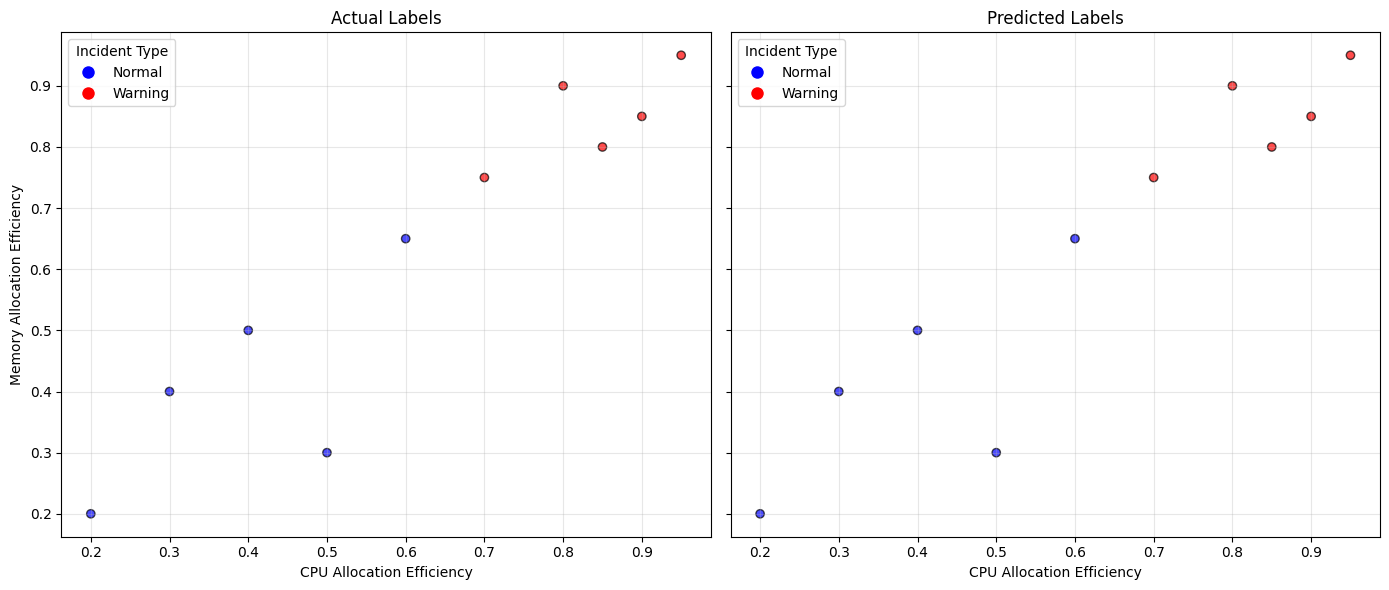

In [159]:
# Predict for the entire dataset
df_simple["predicted_event"] = simple_tree.predict(X)

# %%
# Map actual and predicted labels to colors
color_map = {"Normal": "blue", "Warning": "red"}

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plot actual labels
axes[0].scatter(
    df_simple["cpu_allocation_efficiency"],
    df_simple["memory_allocation_efficiency"],
    c=df_simple["event_type"].map(color_map),
    edgecolor="k",
    alpha=0.7,
)
axes[0].set_title("Actual Labels")
axes[0].set_xlabel("CPU Allocation Efficiency")
axes[0].set_ylabel("Memory Allocation Efficiency")
axes[0].grid(alpha=0.3)

# Plot predicted labels
axes[1].scatter(
    df_simple["cpu_allocation_efficiency"],
    df_simple["memory_allocation_efficiency"],
    c=df_simple["predicted_event"].map(color_map),
    edgecolor="k",
    alpha=0.7,
)
axes[1].set_title("Predicted Labels")
axes[1].set_xlabel("CPU Allocation Efficiency")
axes[1].grid(alpha=0.3)

# Add legends
for ax in axes:
    ax.legend(
        handles=[
            plt.Line2D(
                [0],
                [0],
                marker="o",
                color="w",
                label="Normal",
                markerfacecolor="blue",
                markersize=10,
            ),
            plt.Line2D(
                [0],
                [0],
                marker="o",
                color="w",
                label="Warning",
                markerfacecolor="red",
                markersize=10,
            ),
        ],
        title="Incident Type",
    )

plt.tight_layout()
plt.show()

### 6.2. Visualizing Model Performance: Confusion Matrix

A confusion matrix shows the number of correct and incorrect predictions made by the model, broken down by each class (e.g., `Normal` and `Warning`).

- **True Positives (TP):** Correctly predicted `Normal`.
- **True Negatives (TN):** Correctly predicted `Warning`.
- **False Positives (FP):** Incorrectly predicted `Normal` when it was `Warning`.
- **False Negatives (FN):** Incorrectly predicted `Warning` when it was `Normal`.


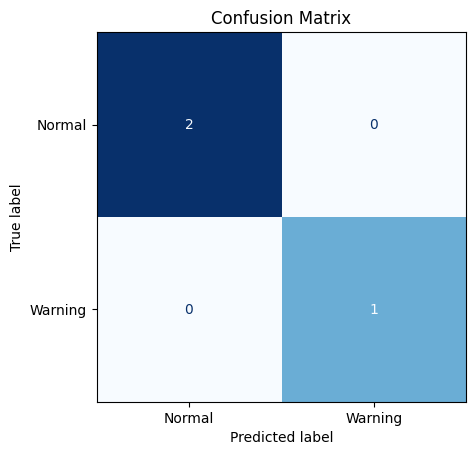

In [160]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(
    simple_tree,
    X_test,
    y_test,
    display_labels=["Normal", "Warning"],
    cmap="Blues",
    colorbar=False,
)
plt.title("Confusion Matrix")
plt.show()

## 7. Conclusion

In this notebook, we introduced the basics of machine learning by predicting Kubernetes incidents (`Normal` vs. `Warning`) using a decision tree classifier. This exercise provided a hands-on understanding of key concepts in supervised learning:

- **Data Preparation:** Splitting datasets into training and testing subsets to evaluate model performance on unseen data.
- **Model Training and Evaluation:** Using a decision tree to classify incidents based on features like CPU and memory allocation efficiencies.
- **Visualization for Insights:** Leveraging tools like scatter plots and confusion matrices to interpret model behavior and identify patterns.

**Takeaways**
- **Decision Trees:** A simple yet effective algorithm for classification tasks, offering interpretability through feature-based decision-making.
- **Feature Importance:** Metrics like CPU and memory allocation efficiencies can strongly influence predictions, demonstrating the importance of selecting relevant features.
- **Model Performance:** While decision trees perform well for simple datasets, more sophisticated models may be needed for complex real-world scenarios.

**Limitations**
- **Dataset Scope:** This example used a simplified, in-memory dataset for educational purposes.
- **Model Complexity:** Decision trees may overfit or underperform compared to ensemble methods like Random Forests or Gradient Boosting.

**What’s Next?**
In the next notebook, we will:
1. Use the **preprocessed dataset** from Notebook 1, containing real Kubernetes operational data.
2. Apply **Linear Regression** for continuous variable predictions (e.g., resource efficiency metrics).
3. Train a **Random Forest Classifier** for improved classification of incidents, comparing its performance to simpler models like decision trees.

This will demonstrate how machine learning can scale to handle more realistic datasets, providing deeper insights into Kubernetes operations.